In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

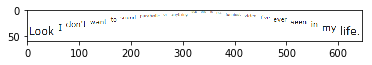

In [9]:
"""
A simple least-sqaures fit for a Reddit comment looking like a parabola; the idea was to find a numerical solution
for the resulting parabola. After loading the image, set all white-ish pixels to 255 and the rest to 0 
(white-ish because I use a cutoff value) and use a linear regression to find the best fit.


"""


def comment_fit(path):
    im = Image.open(path)
    image = np.array(im.getdata(), dtype = np.uint8)
    image = np.reshape(image, (59, 646, 4))
    im = np.array(image[..., 0], dtype = np.uint8) # Using just one layer is alright in this case, so we can discard the rest
    plt.imshow(image)                              # Plotting the input image
    return image, im

image, im = comment_fit("G:\\fit.png")

(array([   1.,    0.,    2.,    0.,    1.,    3.,    1.,    3.,    4.,  631.]),
 array([ 134. ,  146.1,  158.2,  170.3,  182.4,  194.5,  206.6,  218.7,
         230.8,  242.9,  255. ]),
 <a list of 10 Patch objects>)

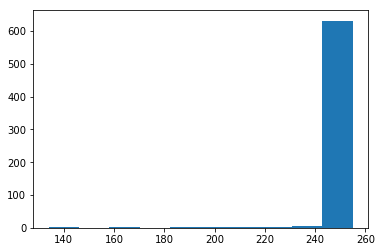

In [10]:
plt.hist(im[1]) # Histogram of the image pixel intensity values

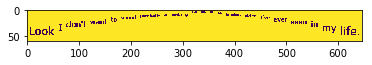

In [11]:
cutoff_value = 240    # Arbitrary value, 240 works well (most pixel intensity values lay in the 242 - 255 range, the rest are the black pixels we care about)
im[im < cutoff_value] = 0
im[im >= cutoff_value] = 255
plt.imshow(im)

In [12]:
coor = np.where(im == 0)
x = coor[1]
y = coor[0]

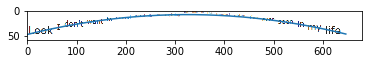

In [13]:
# Model happens here; blue line is what the model predicted.
fit = np.polyfit(x, y, 2)
X = np.linspace(0, 646, num = 646)
Y = [fit[2] + fit[1]*i + fit[0]*i**2 for i in X]
plt.figure()
plt.imshow(image)
plt.plot(X, Y)
plt.show()